In [1]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import os
import copy
import scipy.io
import sys
sys.path.append('/user_data/mmhender/texture_synthesis/code/')
import things_utils

In [2]:
things_utils.choose_concepts()

saving to /user_data/mmhender/things/concepts_removeoverlap.npy
saving to /user_data/mmhender/things/concepts_use.npy


In [3]:
concepts_filename = '/user_data/mmhender/things/concepts_use.npy'
concepts_use = np.load(concepts_filename,allow_pickle=True).item()
categ_names = concepts_use['categ_names']
concept_names = concepts_use['concept_names']
image_names = concepts_use['image_names']
concept_ids = concepts_use['concept_ids']

In [ ]:
{'chicken': 'chicken2', 
 'button': 'button1', 
 'punch': 'punch1', 
 'camera': 'camera1',  # this one could be either?
 'screen': 'screen1', 
 'chest': 'chest2', 
 'juicer': 'juicer2', 
 'walker': 'walker1', 
 

In [11]:
concept_ids

[array(['alligator', 'seal', 'chinchilla', 'lion', 'raccoon', 'weasel',
        'platypus', 'badger', 'turtle', 'squirrel', 'cougar', 'mongoose',
        'cow', 'cat'], dtype=object),
 array(['rooster', 'penguin', 'chicken1', 'flamingo', 'toucan', 'turkey',
        'cockatoo', 'pelican', 'duckling', 'duck', 'ostrich', 'owl',
        'pigeon', 'vulture'], dtype=object),
 array(['elbow', 'knee', 'skull', 'foot', 'bone', 'eye', 'tongue', 'navel',
        'wrist', 'finger', 'hair', 'hip', 'chin', 'arm'], dtype=object),
 array(['outfit', 'hood', 'pants', 'jacket', 'cloak', 'coverall', 'shawl',
        'bathrobe', 'chaps', 'hoodie', 'leggings', 'cape', 'underwear',
        'tuxedo'], dtype=object),
 array(['bandanna', 'hat', 'cufflink', 'headdress', 'purse', 'headscarf',
        'button1', 'scarf', 'belt_buckle', 'top_hat', 'garter', 'boa',
        'tie', 'muff'], dtype=object),
 array(['flask', 'crate', 'cup', 'hatbox', 'thermos', 'bin', 'can',
        'bucket', 'shopping_basket', 'urn', 'o

In [4]:
things_stim_path = '/user_data/mmhender/things/'
things_images_root = os.path.join(things_stim_path, 'Images')

def get_filename(categ_ind, concept_ind, image_ind=0):
    
    concept_info = np.load(os.path.join(things_stim_path, 'concepts_use.npy'), \
                           allow_pickle=True).item()
    
    subfolder = concept_info['concept_ids'][categ_ind][concept_ind]
    image_name = concept_info['image_names'][subfolder][image_ind]
    
    filename = os.path.join(things_images_root, subfolder, image_name)
    
    return filename

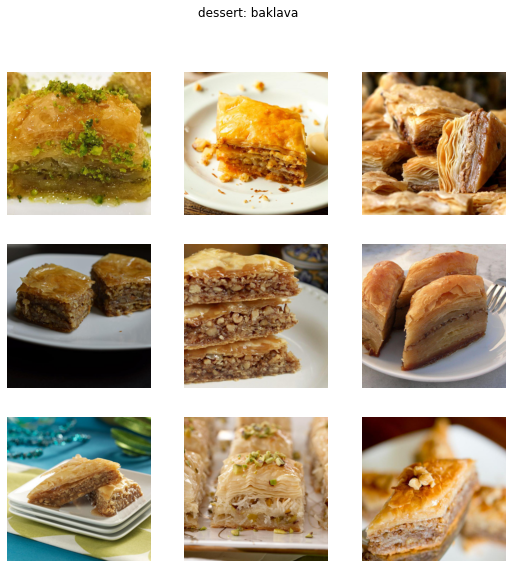

In [5]:
categ = 6;
concept = 4;
n_ims = 9

plt.figure(figsize=(9,9))
pi=0
for ii in range(n_ims):
    
    filename = get_filename(categ, concept, ii)
    im = PIL.Image.open(filename)
    im = im.resize([256,256])
    
    pi+=1
    plt.subplot(3,3,pi)
    plt.imshow(im)
    plt.axis('off')
    
plt.suptitle('%s: %s'%(categ_names[categ], concept_names[categ][concept]));

/user_data/mmhender/things/Images/pheasant/pheasant_01b.jpg
/user_data/mmhender/things/Images/rooster/rooster_01b.jpg
/user_data/mmhender/things/Images/turkey/turkey_01s.jpg
/user_data/mmhender/things/Images/ostrich/ostrich_01b.jpg
/user_data/mmhender/things/Images/seagull/seagull_01b.jpg
/user_data/mmhender/things/Images/crow/crow_01b.jpg
/user_data/mmhender/things/Images/pheasant/pheasant_02s.jpg
/user_data/mmhender/things/Images/rooster/rooster_02s.jpg
/user_data/mmhender/things/Images/turkey/turkey_02s.jpg
/user_data/mmhender/things/Images/ostrich/ostrich_02s.jpg
/user_data/mmhender/things/Images/seagull/seagull_02s.jpg
/user_data/mmhender/things/Images/crow/crow_02s.jpg
/user_data/mmhender/things/Images/pheasant/pheasant_03s.jpg
/user_data/mmhender/things/Images/rooster/rooster_03s.jpg
/user_data/mmhender/things/Images/turkey/turkey_03s.jpg
/user_data/mmhender/things/Images/ostrich/ostrich_03s.jpg
/user_data/mmhender/things/Images/seagull/seagull_03s.jpg
/user_data/mmhender/things

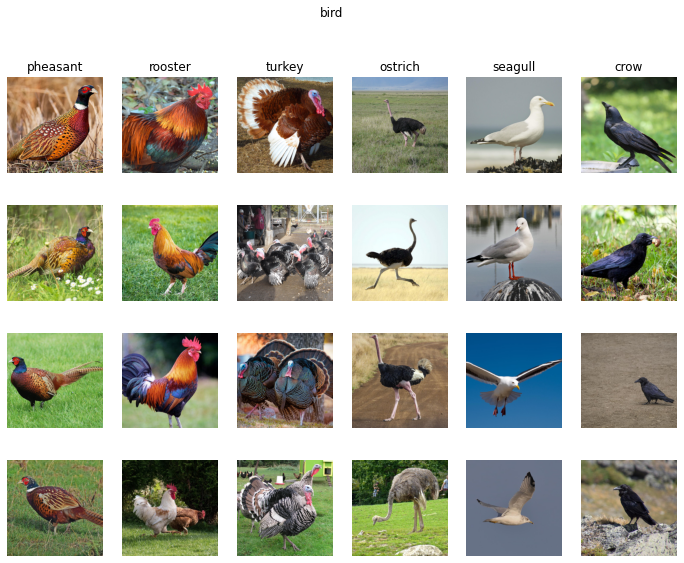

In [6]:
for categ_ind in [1]:
    
    concept_inds = np.arange(6)
    n_ims_plot = 4

    plt.figure(figsize=(12,9))
    pi=0
    for ii in range(n_ims_plot):

        for concept_ind in concept_inds:

            filename = get_filename(categ_ind, concept_ind, ii)
            print(filename)
            im = PIL.Image.open(filename)
            im = im.resize([256,256])

            pi+=1
            plt.subplot(n_ims_plot, len(concept_inds), pi)
            plt.imshow(im)
            plt.axis('off')
            if ii==0:
                plt.title(concept_names[categ_ind][concept_ind])

    plt.suptitle('%s'%(categ_names[categ_ind]));

In [9]:
concepts_filename = '/user_data/mmhender/things/concepts_use.npy'
concepts_use = np.load(concepts_filename,allow_pickle=True).item()
categ_names = concepts_use['categ_names']
concept_names = concepts_use['concept_names']
image_names = concepts_use['image_names']

In [10]:
categ_names

['animal',
 'bird',
 'body_part',
 'clothing',
 'clothing_accessory',
 'container',
 'dessert',
 'drink',
 'electronic_device',
 'food',
 'fruit',
 'furniture',
 'home_decor',
 'insect',
 'kitchen_appliance',
 'kitchen_tool',
 'medical_equipment',
 'musical_instrument',
 'office_supply',
 'part_of_car',
 'plant',
 'sports_equipment',
 'tool',
 'toy',
 'vegetable',
 'vehicle',
 'weapon']

In [4]:
names = image_names['alligator']
# names.sort()
names

['alligator_01b.jpg',
 'alligator_02s.jpg',
 'alligator_03n.jpg',
 'alligator_04s.jpg',
 'alligator_05s.jpg',
 'alligator_06s.jpg',
 'alligator_07s.jpg',
 'alligator_08s.jpg',
 'alligator_09s.jpg',
 'alligator_10s.jpg',
 'alligator_11s.jpg',
 'alligator_12s.jpg',
 'alligator_13n.jpg',
 'alligator_14n.jpg']

In [7]:
n_categ = len(categ_names)
n_concepts_each = len(concept_names[0])

In [8]:
n_categ

27

In [ ]:
things_images_root = '/user_data/mmhender/things/Images/'

In [ ]:
image_names = dict()

for categ_ind in range(n_categ):
    for concept_ind in range(n_concepts_each):

        conc = concept_ids[categ_ind][concept_ind]
        folder = os.path.join(things_images_root, conc)
        
        try:
            files = os.listdir(folder)
        except:
            print(categ_names[categ_ind])
            print('cannot find %s'%folder)
            folder_names = os.listdir(things_images_root)
            inds = np.where([conc in f for f in folder_names])[0]
            print([folder_names[ii] for ii in inds])
            continue
        image_names[conc] = files

In [ ]:
n_images = [len(vv) for vv in image_names.values()]
np.min(n_images)

12

In [ ]:
image_names['alligator']

['alligator_04s.jpg',
 'alligator_08s.jpg',
 'alligator_10s.jpg',
 'alligator_09s.jpg',
 'alligator_11s.jpg',
 'alligator_14n.jpg',
 'alligator_05s.jpg',
 'alligator_01b.jpg',
 'alligator_07s.jpg',
 'alligator_06s.jpg',
 'alligator_02s.jpg',
 'alligator_13n.jpg',
 'alligator_12s.jpg',
 'alligator_03n.jpg']

In [9]:
inds = np.where(['chicken' in uid for uid in df['uniqueID']])[0]
inds

array([322, 323, 324])

In [15]:
import numpy as np
conc = 'chicken'
conc_inds = np.where((np.array(df['Word'])==conc))[0]
categ_poss1 = df['Bottom-up Category (Human Raters)'].iloc[conc_inds]
print(categ_poss1)
categ_poss2 = df['Top-down Category (manual selection)'].iloc[conc_inds]
print(categ_poss2)

323    animal, bird
324             NaN
Name: Bottom-up Category (Human Raters), dtype: object
323      food
324    animal
Name: Top-down Category (manual selection), dtype: object


In [14]:
df.keys()

Index(['Word', 'uniqueID', 'Example image', 'Bigram', 'Percent_known',
       'Rank (combining COCA/concreteness)', 'Concreteness (M)',
       'COCA word freq (online)', 'COCA word freq', 'COCA (dispersion)',
       'COCA (rank)', 'BNC freq', 'SUBTLEX freq', 'Dominant Part of Speech',
       'Bottom-up Category (Human Raters)', 'Top-down Category (WordNet)',
       'Top-down Category (manual selection)', 'All Bottom-up Categories',
       'WordNet Synonyms', 'WordNet ID', 'Wordnet ID2', 'Wordnet ID3',
       'Wordnet ID4', 'Definition (from WordNet, Google, or Wikipedia)',
       'Number of word meanings in list'],
      dtype='object')